In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('Superstore.csv',encoding='latin1')
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [8]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [11]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [12]:
data.drop(['Row ID','Order ID','Customer ID','Product ID','Postal Code'],axis=1,inplace=True)

In [13]:
data.head(3)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,6/12/2016,6/16/2016,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [14]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [15]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [16]:
data.dtypes

Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Region                   object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [17]:
data.duplicated().sum()

1

In [18]:
data = data.drop_duplicates()

In [19]:
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month_name()
data['Ship Duration'] = (data['Ship Date'] - data['Order Date']).dt.days

In [20]:
data.head(3)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Ship Duration
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,November,3
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,November,3
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2016,June,4


In [21]:
d = data.groupby('Quantity')['Sales'].sum()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16508\3747672385.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=d.index, y=d.values, palette='viridis')


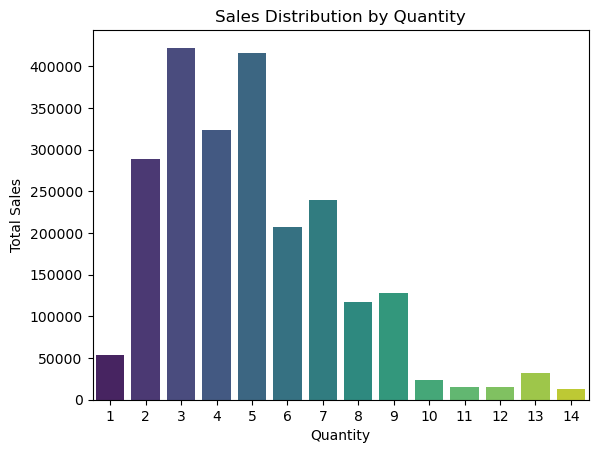

In [22]:
sns.barplot(x=d.index, y=d.values, palette='viridis')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Quantity')
plt.show()

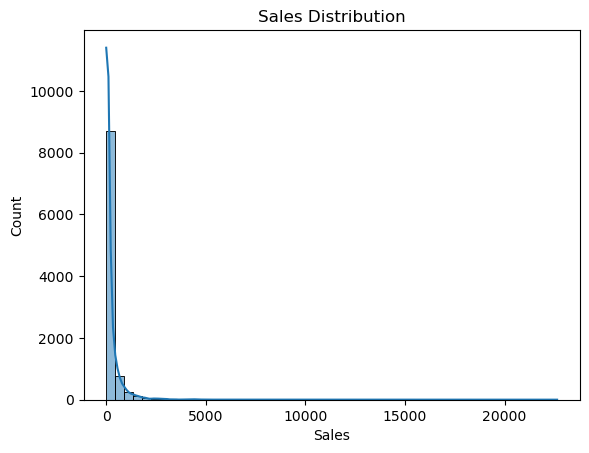

In [23]:
sns.histplot(data['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()

In [24]:
data.head(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Ship Duration
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,November,3
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,November,3


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16508\3368718141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=d.index, y=d.values, palette='viridis')


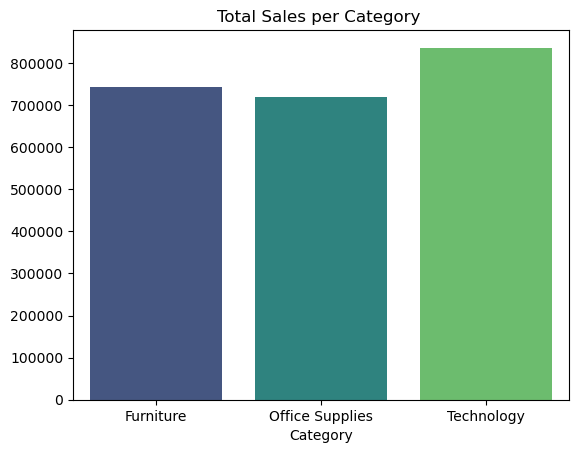

In [25]:
d = data.groupby('Category')['Sales'].sum()
sns.barplot(x=d.index, y=d.values, palette='viridis')
plt.title("Total Sales per Category ")
plt.show()

In [26]:
d = data.groupby(['Country','Ship Duration'])['Sales'].mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16508\2112244287.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=d, y=d.values, palette='viridis')


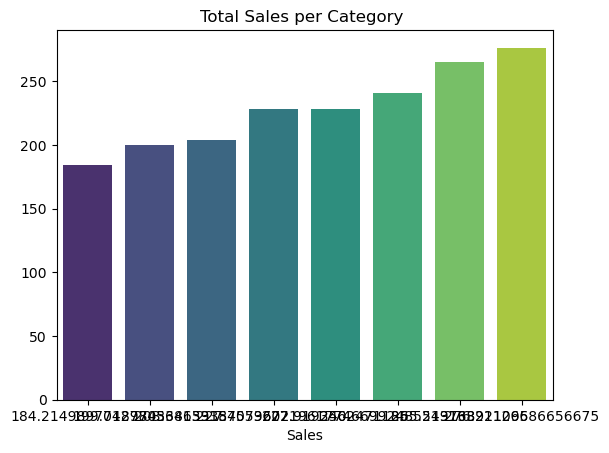

In [27]:
sns.barplot(x=d, y=d.values, palette='viridis')

plt.title("Total Sales per Category ")
plt.show()

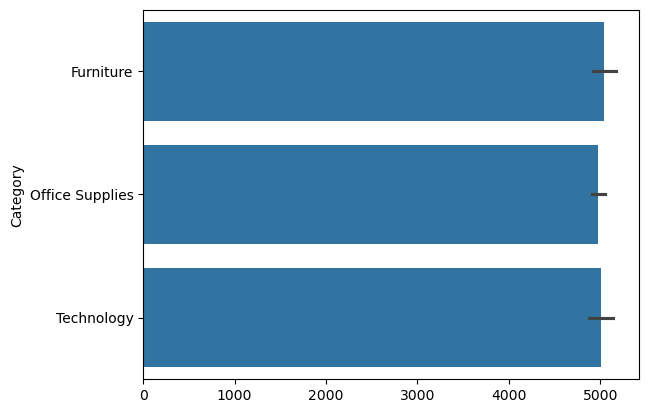

In [28]:
sns.barplot(data['Category'])
plt.show()

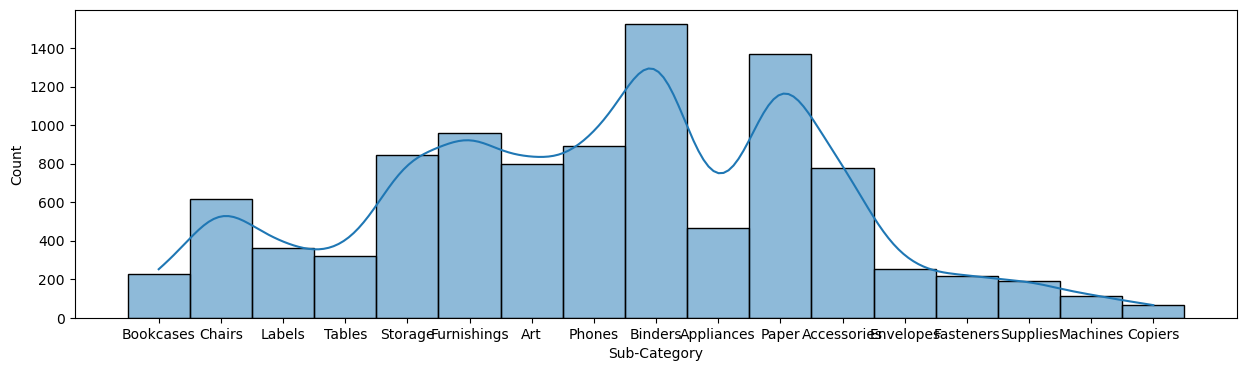

In [318]:
plt.figure(figsize=(15,4))
sns.histplot(data['Sub-Category'],kde=True)
plt.show()

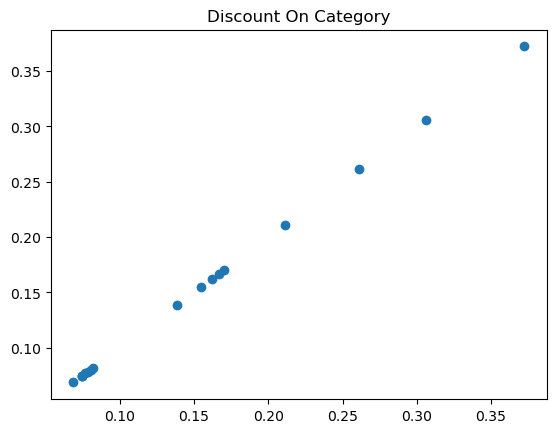

In [298]:
d = data.groupby(['Category','Sub-Category'])['Discount'].mean()
plt.title('Discount On Category')
plt.scatter(x=d, y=d.values)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16508\709702736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=d.index, y=d.values, palette='viridis')


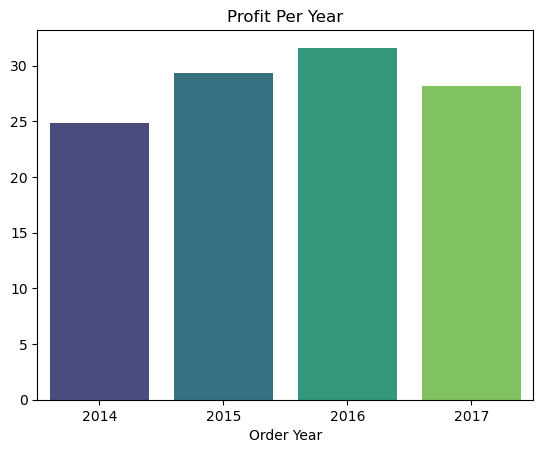

In [31]:
d = data.groupby('Order Year')['Profit'].mean()
sns.barplot(x=d.index, y=d.values, palette='viridis')
plt.title("Profit Per Year")
plt.show()

In [32]:
data.head(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Ship Duration
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,November,3
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,November,3


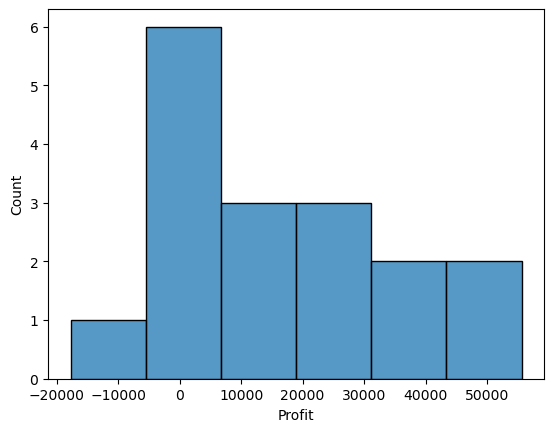

In [39]:
d = data.groupby(['Category','Sub-Category'])['Profit'].sum()
sns.histplot(d)
plt.show()

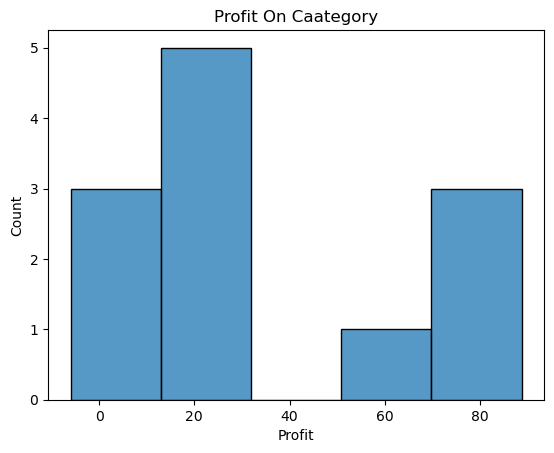

In [300]:
d = data.groupby(['Category','Region'])['Profit'].mean()
sns.histplot(d)
plt.title('Profit On Caategory')
plt.show()

In [200]:
d = data.groupby('Region')['Profit'].sum()
d

Region
Central     39706.3625
East        91534.8388
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

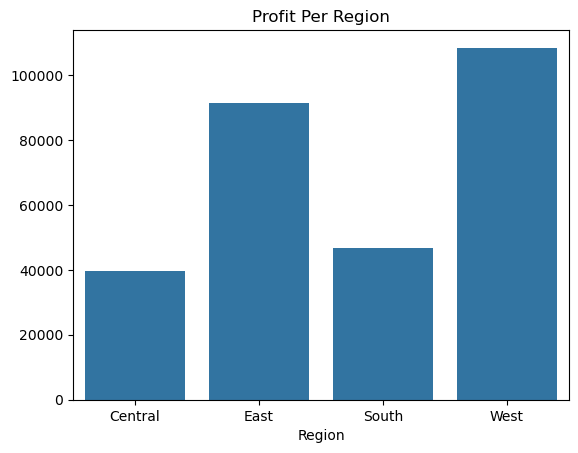

In [202]:
sns.barplot(x=d.index,y=d.values)
plt.title('Profit Per Region')
plt.show()

In [193]:
d = data.groupby(['Sub-Category','Discount'])['Profit'].mean()

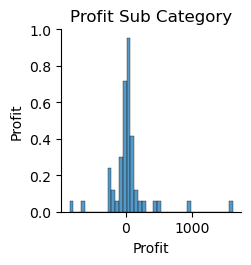

In [195]:
sns.pairplot(pd.DataFrame(d))
plt.title('Profit Sub Category')
plt.show()

In [105]:
d = data.groupby('Segment')['Profit'].sum()

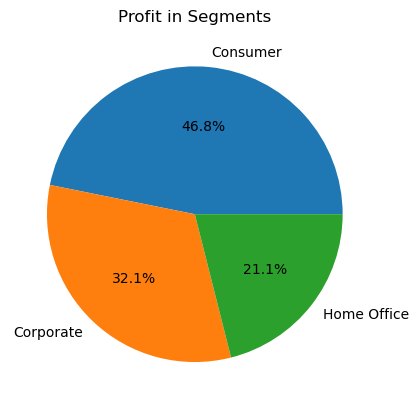

In [115]:
plt.pie(d,labels=d.index,data=data,autopct='%1.1f%%')
plt.title('Profit in Segments')
plt.show()

In [246]:
d= data.groupby('Sub-Category')['Profit'].sum()

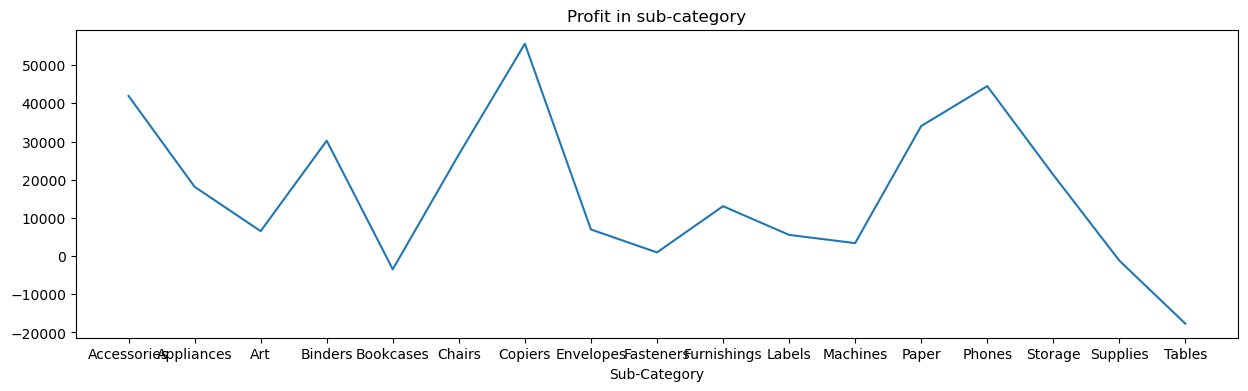

In [250]:
plt.figure(figsize=(15,4))
sns.lineplot(x=d.index,y=d.values)
plt.title('Profit in sub-category')
plt.show()

In [171]:
data.head(2)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Ship Duration
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,November,3
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,November,3


In [177]:
d = data.groupby('Order Year')['Profit'].sum()

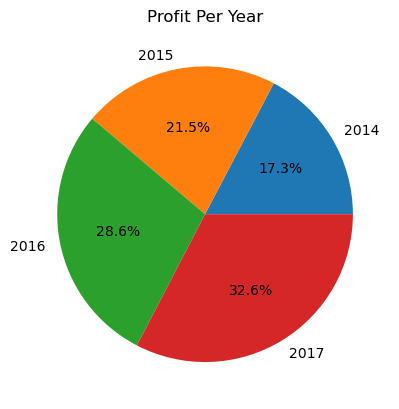

In [183]:
plt.pie(d,labels=d.index,data=data,autopct='%1.1f%%')
plt.title('Profit Per Year')
plt.show()

In [304]:
d= data.groupby('Ship Mode')['Ship Duration'].mean()

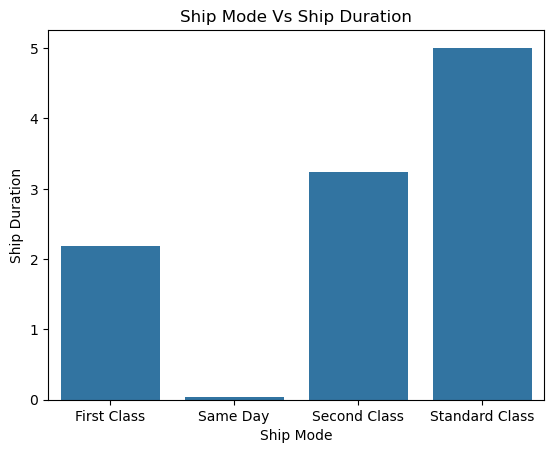

In [306]:
sns.barplot(d)
plt.title('Ship Mode Vs Ship Duration')
plt.show()

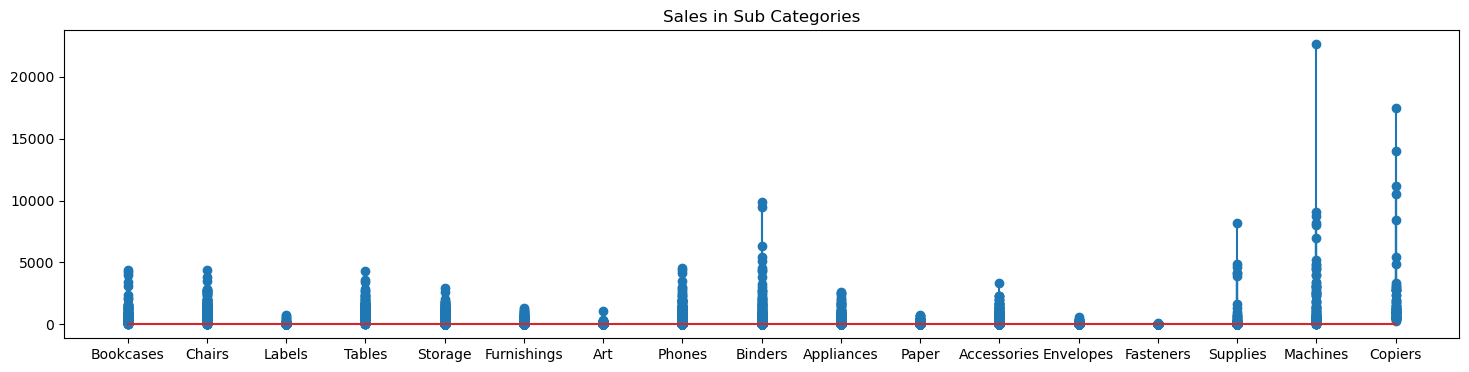

In [308]:
plt.figure(figsize=(18,4))
plt.stem(data['Sub-Category'],data['Sales'])
plt.title('Sales in Sub Categories')
plt.show()

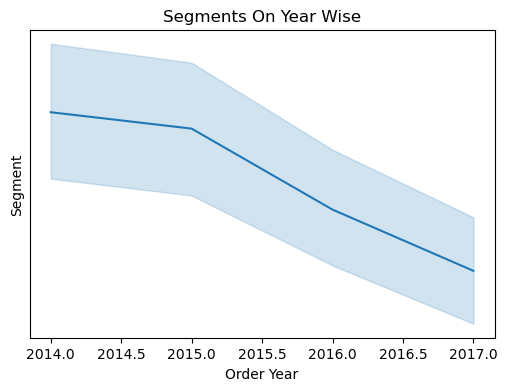

In [310]:
plt.figure(figsize=(6,4))
sns.lineplot(x=data['Order Year'],y=data['Segment'])
plt.title('Segments On Year Wise')
plt.show()

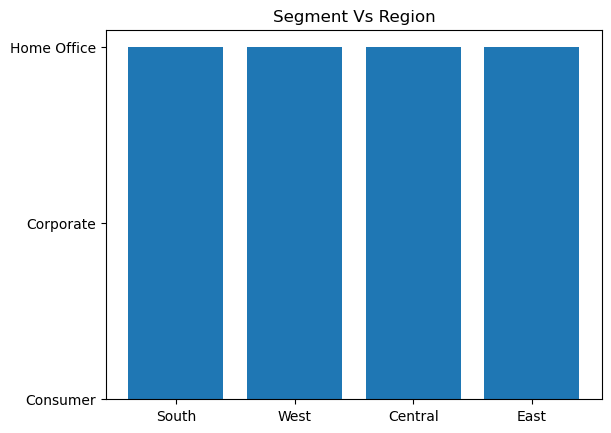

In [312]:
plt.bar(data['Region'],data['Segment'])
plt.title('Segment Vs Region')
plt.show()

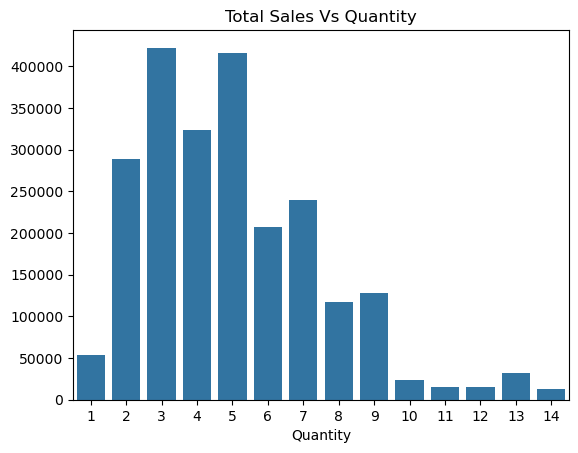

In [326]:
d= data.groupby('Quantity')['Sales'].sum()
plt.title('Total Sales Vs Quantity')
sns.barplot(x=d.index,y=d.values)
plt.show()

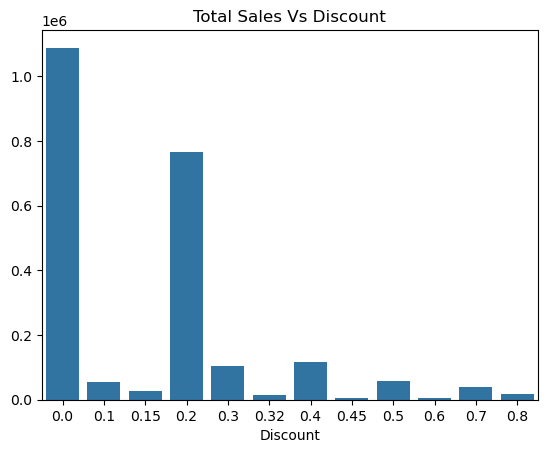

In [330]:
d= data.groupby('Discount')['Sales'].sum()
plt.title('Total Sales Vs Discount')
sns.barplot(x=d.index,y=d.values)
plt.show()